In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.patches as patches
import math

In [2]:
#First get sorted VAF data
#import data, add labels, merge into one big df each for snp and indel

directory = '../Data/VAF_data/VAF_sorted/'

df_snp = None
df_indel = None

for i, file in enumerate(os.listdir(directory)):

    if 'fields' not in file:
            continue
    else:
        pt_id = int('612' + file.split('_')[1].split('C')[0])
        time = 'C' + file.split('_')[1].split('C')[1]
        cell_t = file.split('_')[2]
        if 'snp' in file:
            var_type = 'snp'
        elif 'indel'in file:
            var_type = 'indel'
        filename = os.path.join(directory, file)
        df = pd.read_csv(filename, sep = '\t')
        df['PID'] = pt_id #
        df['timepoint'] = time
        df['var_type'] = var_type
        df['cell_type'] = cell_t #be sure to add this column when importing original data
        df['VAF'] = df['GEN[*].FREQ'].str.rstrip('%').astype('float') / 100.0

        if var_type == 'snp':
            if df_snp is None:
                df_snp = df.copy()
            else:
                df_snp = df_snp.append(df, ignore_index = True)
                
            
        elif var_type == 'indel':
            if df_indel is None:
                df_indel = df.copy()
            else:
                df_indel = df_indel.append(df, ignore_index = True)

In [3]:
#Merge data and add pt_id column without spacers
df_sort = df_snp.append(df_indel, ignore_index = True)
df_sort

,CHROM,POS,REF,ALT,GEN[*].GT,GEN[*].FREQ,GEN[*].PVAL,GEN[*].RD,GEN[*].AD,ANN[*].GENE,...,avsnp150,CLINSIG,ExAC_ALL,cosmic70,gnomAD_exome_ALL,PID,timepoint,var_type,cell_type,VAF
0,chr1,20915701,A,C,0/1,48.77%,4.692600e-30,83,79,CDA~CDA~CDA~CDA,...,rs2072671,.,0.28,.,0.2798,61293005,C1,snp,mo,0.4877
1,chr1,36932463,A,G,0/1,53.9%,2.023100e-32,71,83,CSF3R~CSF3R~CSF3R~MRPS15~MRPS15~CSF3R~CSF3R~CS...,...,rs148916169,.,0.0057,.,0.0062,61293005,C1,snp,mo,0.5390
2,chr1,36934805,C,G,0/1,44.76%,5.544600e-24,79,64,CSF3R~CSF3R~CSF3R~CSF3R~CSF3R~CSF3R~CSF3R~CSF3...,...,rs3917991,Benign,0.024,.,0.0214,61293005,C1,snp,mo,0.4476
3,chr10,27303605,A,T,0/1,45.08%,9.806800e-21,67,55,ANKRD26~ANKRD26~ANKRD26~ANKRD26,...,rs2274741,Benign|Likely_benign,0.23,.,0.2215,61293005,C1,snp,mo,0.4508
4,chr10,27317840,C,T,0/1,37.4%,6.860500e-18,82,49,ANKRD26~ANKRD26~ANKRD26~ANKRD26,...,rs10829163,Benign|Likely_benign,0.22,.,0.2206,61293005,C1,snp,mo,0.3740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,chr11,108121410,C,CT,0/1,18.97%,1.204400e-11,100,33,ATM~ATM~ATM~ATM~ATM,...,rs34325032,Benign,0.0077,.,0.3709,61201001,C7,indel,33,0.1897
3609,chr16,14700638,AT,A,0/1,33.33%,1.545500e-03,11,8,PARN~PARN~PARN~PARN~PARN~PARN~RN7SL274P~PARN~P...,...,rs373632720,.,.,.,.,61201001,C7,indel,33,0.3333
3610,chr4,106157384,A,AC,0/1,37.74%,8.179600e-35,160,97,TET2~TET2~TET2~TET2~TET2~TET2~TET2~TET2~TET2~T...,...,rs780857558,.,0.,.,8.159e-06,61201001,C7,indel,33,0.3774
3611,chr9,2039776,ACAG,A,0/1,2.67%,7.498200e-03,252,7,SMARCA2~SMARCA2~SMARCA2~SMARCA2~SMARCA2~SMARCA...,...,rs113070757,Benign,0.14,"ID\x3dCOSM2156556,COSM2156557\x3bOCCURENCE\x3d...",.,61201001,C7,indel,33,0.0267


In [4]:
#Make list of patients for sort VAF analysis
sort_pt = df_sort['PID'].drop_duplicates().to_list()

In [5]:
#Now get BM MNC VAF data
#import data, add labels, merge into one big df each for snp and indel

directory2 = '../Data/VAF_data/VAF_whole_BM/'

df_snp = None
df_indel = None

for i, file in enumerate(os.listdir(directory2)):

    if 'fields' not in file:
            continue
    else:
        pt_id = file.split('_')[1] + '_' + file.split('_')[2]
        time = file.split('_')[3].split('D')[0]
        if 'snp' in file:
            var_type = 'snp'
        elif 'indel'in file:
            var_type = 'indel'
        filename = os.path.join(directory2, file)
        df = pd.read_csv(filename, sep = '\t')
        df['pt_id'] = pt_id
        df['cell_type'] = 'BM' 
        if time == 'SUS':
            df['timepoint'] = 'SusPD'
            #print(pt_id, time, 'SUS fixed')
        elif time == 'SusP':
            df['timepoint'] = 'SusPD'
            #print(pt_id, time, 'SusP fixed')
        elif time == 'C10':
            df['timepoint'] = 'SusPD'
            #print(pt_id, time, 'C10 fixed')
        else:
            df['timepoint'] = time
        df['var_type'] = var_type
        df['VAF'] = df['GEN[*].FREQ'].str.rstrip('%').astype('float') / 100.0

        if var_type == 'snp':
            if df_snp is None:
                df_snp = df.copy()
            else:
                df_snp = df_snp.append(df, ignore_index = True)
                
            
        elif var_type == 'indel':
            if df_indel is None:
                df_indel = df.copy()
            else:
                df_indel = df_indel.append(df, ignore_index = True)

In [6]:
#Merge data and add pt_id column without spacers
df_bm = df_snp.append(df_indel, ignore_index = True)
p_list = df_bm['pt_id'].to_list()
new_plist = list(int(p.replace('_', '')) for p in p_list)
new_plist2 = list(p.replace('_', '-') for p in p_list)
pid = dict(zip(p_list, new_plist))
pid2 = dict(zip(new_plist2, new_plist))
df_bm['PID'] = df_bm['pt_id'].replace(pid)
df_bm.drop(columns = 'pt_id', inplace = True)

In [7]:
#Merge both sets of data
#Merge data and add pt_id column without spacers
df_merge = df_sort.append(df_bm, ignore_index = True)
print(df_sort.shape[0], df_bm.shape[0], df_merge.shape[0]) #sum of #rows is correct

3613 1246 4859


In [8]:
#Filtering
freq = 0.001 #frequency cut off for databases

df_all_filter = df_merge.copy()
rep = {'.': 0}
crit = 'all'  #any OR all

#Replace '.' with a 0
df_all_filter['1000G_ALL_rep'] = df_all_filter['1000G_ALL'].replace(rep)
df_all_filter['gnomAD_exome_ALL_rep'] = df_all_filter['gnomAD_exome_ALL'].replace(rep)
df_all_filter['ExAC_ALL_rep'] = df_all_filter['ExAC_ALL'].replace(rep)

#Make remaining values numeric

df_all_filter['1000G_ALL_rep'] = pd.to_numeric(df_all_filter['1000G_ALL_rep'], downcast = 'float')
df_all_filter['gnomAD_exome_ALL_rep'] = pd.to_numeric(df_all_filter['gnomAD_exome_ALL_rep'], downcast = 'float')
df_all_filter['ExAC_ALL_rep'] = pd.to_numeric(df_all_filter['ExAC_ALL_rep'], downcast = 'float')

#Select rows that fit criteria
df_all_filter = df_all_filter.loc[(df_all_filter['snp138NonFlagged'] == '.')]

if crit == 'any':
    df_all_filter = df_all_filter.loc[(df_all_filter['1000G_ALL_rep'] < freq) | (df_all_filter['gnomAD_exome_ALL_rep'] < freq) | (df_all_filter['ExAC_ALL_rep'] < freq)]
elif crit == 'all':
    df_all_filter = df_all_filter.loc[(df_all_filter['1000G_ALL_rep'] < freq) & (df_all_filter['gnomAD_exome_ALL_rep'] < freq) & (df_all_filter['ExAC_ALL_rep'] < freq)]

In [9]:
#Make new POS columns that's a string
pos = df_all_filter['POS'].drop_duplicates().to_list()
pos_dict = {}
for x in pos:
    pos_dict[x] = str(x)

    #Add some useful columns
df_all_filter['gene'] = df_all_filter['ANN[*].GENE'].str.split('~').str[0]
df_all_filter['mut'] = df_all_filter['ANN[*].HGVS_P'].str.split('~').str[0]
df_all_filter['POS2'] = df_all_filter['POS'].replace(pos_dict)
df_all_filter['coord'] = df_all_filter['CHROM'] + ':' + df_all_filter['POS2']
df_all_filter['mut2'] = df_all_filter['gene'] + '_' + df_all_filter['CHROM'] + ':' + df_all_filter['POS2'] + '_' + df_all_filter['REF'] + '>' + df_all_filter['ALT']
df_all_filter['var_name'] = df_all_filter['gene'] + '_' + df_all_filter['mut']

genes = df_all_filter['gene'].drop_duplicates().to_list()

In [10]:
#Import and process blacklist containing false variants
df3 = pd.read_excel('../Data/VAF_data/AMLgp111_PotentialfalsevariantsList_070322PMK.xlsx', header = 1 )
        
# #Add extra labelling columns
pos2 = df3['POS'].drop_duplicates().to_list()
pos_dict2 = {}
for x in pos2:
    pos_dict2[x] = str(x)
df3['gene'] = df3['ANN[*].GENE'].str.split('~').str[0]
df3['mut'] = df3['ANN[*].HGVS_P'].str.split('~').str[0]
df3['POS2'] = df3['POS'].replace(pos_dict2)
df3['coord'] = df3['CHROM'] + ':' + df3['POS2']
df3['mut2'] = df3['gene'] + '_' + df3['CHROM'] + ':' + df3['POS2'] + '_' + df3['REF'] + '>' + df3['ALT']
df3['var_name'] = df3['gene'] + '_' + df3['mut']

pmk_blacklist = df3['coord'].drop_duplicates().to_list()

In [11]:
#Exclude blacklisted VAFs, add composite column, and write to excel
df_all_filter_no_blklist = df_all_filter.loc[~df_all_filter['coord'].isin(pmk_blacklist)]
df_all_filter_no_blklist['time_cell'] = df_all_filter_no_blklist['timepoint'] + '_' + df_all_filter_no_blklist['cell_type']
df_all_filter_no_blklist.to_excel('../Results/all_VAF_data_rmblklist.xlsx')

<ipython-input-11-b69aea88ae41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_filter_no_blklist['time_cell'] = df_all_filter_no_blklist['timepoint'] + '_' + df_all_filter_no_blklist['cell_type']


In [12]:
#Create numbers for plotting paticular categories
t_points = ['C1_BM', 'C1_33','C1_NK', 'C1_mo', 'C7_BM', 'C7_33', 'C7_NK', 'C7_mo', 'C12_BM', 'SusPD_BM']
t_points_sub = ['C1_BM', 'C1_33','C1_NK', 'C1_mo', 'C7_BM', 'C7_33', 'C7_NK', 'C7_mo']
t_points_sub2 = ['BM', 'CD33+','NK', 'Mono', 'BM', 'CD33+','NK', 'Mono']

t_points_sub_reorder = ['C1_BM', 'C1_33', 'C1_mo','C1_NK', 'C7_BM', 'C7_33', 'C7_mo', 'C7_NK']
t_points_sub2_reorder = ['BM', 'imMye', 'Mono','NK', 'BM', 'imMye', 'Mono','NK']

x_cat = [x for x in range(len(t_points))]
x_cat2 = [0, 0, 0, 0, 1, 1, 1, 1, 2, 3]
tx_dict = dict(zip(t_points, x_cat))
tx_dict2 = dict(zip(t_points, x_cat2))
xt_dict = dict(zip(x_cat, t_points))

In [13]:
#Add column with x plot coordinate categories and another for plotting cycles separately
df_all_filter_no_blklist['x_coord'] = df_all_filter_no_blklist['time_cell'].replace(tx_dict)
df_all_filter_no_blklist['x_coord2'] = df_all_filter_no_blklist['time_cell'].replace(tx_dict2)

<ipython-input-13-a6d855d91602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_filter_no_blklist['x_coord'] = df_all_filter_no_blklist['time_cell'].replace(tx_dict)
<ipython-input-13-a6d855d91602>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_filter_no_blklist['x_coord2'] = df_all_filter_no_blklist['time_cell'].replace(tx_dict2)


In [14]:
#Outcomes for labelling
C6_outcomes = {61201001: 'non-responder_2',
     61213005: 'responder_1',
     61250003: 'responder_1',
     61250004: 'non-responder_2',
     61250005: 'responder_1',
     61289001: 'responder_1',
     61289003: 'non-responder_2',
     61293004: 'responder_1',
     61293005: 'responder_1'}

#Sorting list
sort_pt_sorted = [61250003,
                 61289001,
                 61293005,
                 61250005,
                 61213005,
                 61293004,              
                 61201001,
                 61250004,
                 61289003]  

#By response
resp = [61250003,
         61289001,
         61293005,
         61250005,
         61213005,
         61293004]  

nonresp = [61201001,
            61250004,
            61289003]

In [15]:
#Now import clinical data and plot into a gridspec
#Get CRF outcome codes, these are in AN:6 - AO:14 from an earlier data pull from Sarah
out = pd.read_excel('../Data/Pt_outcomes/Oral AZA_labs plus disease response at 11Mar2022.xlsx', skiprows = 4, nrows = 9, usecols = 'AN:AO')
out.columns = ['IWG_code', 'IWG_disease_status']
#Numbers need to be floats later
codes = [float(i[0]) for i in out['IWG_code']]
out_dict2 = dict(zip(codes, out['IWG_disease_status']))

In [16]:
#IWG outcomes
df1 = pd.read_excel('../Data/Pt_outcomes/Oral AZA_labs plus disease response at 11Mar2022.xlsx', skiprows = 21)
df1['PID'] = df1['Study Subject ID'].replace(pid2)
df1 = df1.loc[df1['PID'].isin(sort_pt_sorted)]
#Add in diagnosis and CRF outcomes, make a sub dataframe with only that info
df1['C7_response'] = df1[' IWGCritMet_E21_C116 '].replace(out_dict2)
IWG_dict = dict(zip(df1['PID'].to_list(), df1['C7_response'].to_list()))
IWG_dict[61289001] = 'CR' #based on max cell count reponses

In [17]:
#Timepoint codes from new data pull
df3 = pd.read_excel('../Data/Pt_outcomes/EXCEL_Haem_at_all_timepoints_2022-03-23-091654963.xls.xlsx', skiprows = 7, usecols = 'B:C', nrows = 21)
code = df3.loc[df3['Unnamed: 2'].str.contains('E') == True]['Unnamed: 2'].to_list()
time = df3.loc[df3['Unnamed: 2'].str.contains('E') == True][15].to_list()
time_dict = dict(zip(code, time))

In [18]:
#Get new PB data pull w/ all timepoints and keep just the 9 patients
df4 = pd.read_excel('../Data/Pt_outcomes/EXCEL_Haem_at_all_timepoints_2022-03-23-091654963.xls.xlsx', skiprows = 30)
df4 = df4.drop(columns = ['Protocol ID'])
df4 = df4.loc[: , (~df4.columns.str.contains('BlastsYesNo'))] #drop any columns with blast yes/no data
df4['PID'] = df4['Study Subject ID'].replace(pid2)
pb_data = df4.loc[df4['PID'].isin(sort_pt_sorted)]
pb_data = pb_data.set_index('PID')
pb_data.drop(columns = ['Study Subject ID', 'Screen'], inplace = True)
pb_cols = list(pb_data.columns)
pb_cols_drop = []
for c in pb_cols:
    if 'Blasts' in c:
        pb_cols_drop.append(c)
    elif 'DateHaem' in c:
        pb_cols_drop.append(c)
pb_data.drop(columns = pb_cols_drop, inplace = True)

In [19]:
#Make column headings easier to follow
pb_data2 = pb_data.copy()
pb_cols1 = list(pb_data.columns)
pb_cols2 = []
celabr = {' Haemoglobin':'Hb',
 ' WBC':'WBC',
 ' Neutrophils':'Neut',
 ' Lymphocytes':'Lymph',
 ' Monocytes':'Mono',
 ' Eosinophils':'Eos',
 ' Basophils':'Bas',
 ' Reticulocytes':'Ret',
 ' Platelets':'Plt'}
for c in pb_cols1:
        if c.split('_')[1] == 'SCR':
            c2 = celabr[c.split('_')[0]] + '_' + time_dict[c.split('_')[2]]

        else:  
            c2 = celabr[c.split('_')[0]] + '_' + time_dict[c.split('_')[1]]

        pb_cols2.append(c2)
        
pb_data2.columns = pb_cols2

In [20]:
#Get blast data
#Codes
df5 = pd.read_excel('../Data/Pt_outcomes/EXCEL_BMA_mandatory_data__2022-03-29-123453834.xls.xlsx', usecols = 'B:C', skiprows = 7, nrows = 7)
df5.columns = ['Time', 'Code']
blast_code = dict(zip(df5['Code'].to_list(), df5['Time'].to_list()))
#Blast data
df5 = pd.read_excel('../Data/Pt_outcomes/EXCEL_BMA_mandatory_data__2022-03-29-123453834.xls.xlsx',  skiprows = 16)

df5['PID'] = df5['Study Subject ID'].replace(pid2)
bm_data = df5.loc[df5['PID'].isin(sort_pt_sorted)]
bm_data = bm_data.set_index('PID')
bm_data2 = bm_data.loc[: , (bm_data.columns.str.contains('Asp_Blasts'))]

asp_cols = [blast_code[x] for x in list(bm_data2.columns.str.split('_').str[2])]
asp_cols
bm_data2.columns = asp_cols
bm_data2_fillna = bm_data2.fillna('')

bm_data2_fillna.drop(columns = ['C1D1', 'C1D8', 'C12D29', 'Progression'], inplace = True)
bm_data2_fillna.columns = ['BMblast_pre', 'BMblast_post']

In [21]:
#Combine all data
clin_data = bm_data2_fillna.join(pb_data2)
clin_data['PID'] = clin_data.index.get_level_values(0)

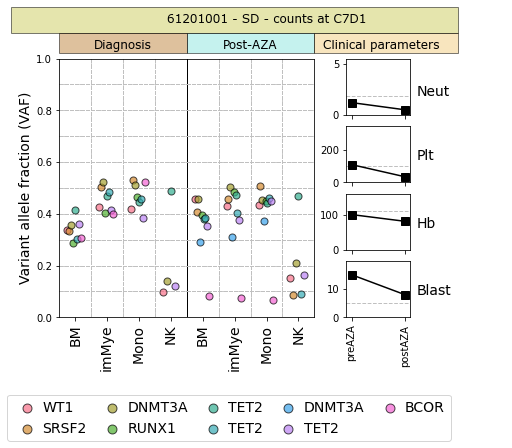

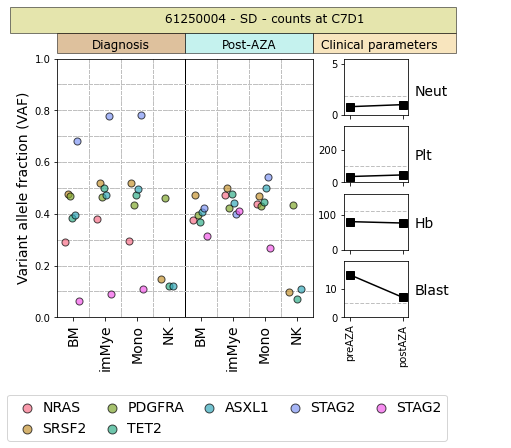

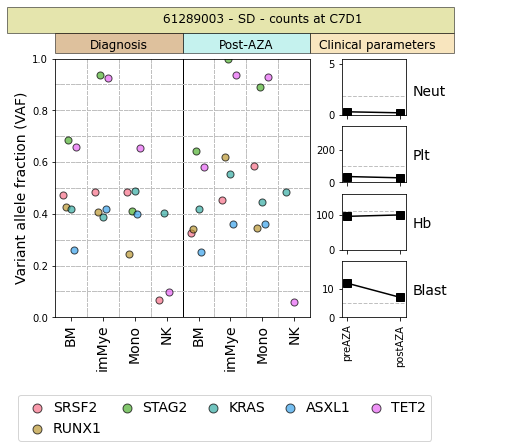

In [24]:
#Now graph the non responders - just clinical data at C7, filter out low freq variants

#Scaling for clindata graphs

#Scaling on max datapoint for all patients (all patients)
maxn = clin_data.loc[: , (clin_data.columns.str.contains('Neut'))].max().max() * 1.1
maxp = clin_data.loc[: , (clin_data.columns.str.contains('Plt'))].max().max() * 1.1
maxh = clin_data.loc[: , (clin_data.columns.str.contains('Hb'))].max().max() * 1.1
maxb = clin_data.loc[: , (clin_data.columns.str.contains('BM'))].max().max() * 1.1


for p in nonresp:
    fig = plt.figure(figsize = (8, 6))
    gs = fig.add_gridspec(5, 5)
    gs.update(wspace=0.5,hspace=0.2)
    ax0 = fig.add_subplot(gs[0:4, 0:3])
    ax1 = fig.add_subplot(gs[0,3])
    ax2 = fig.add_subplot(gs[1,3])
    ax3 = fig.add_subplot(gs[2,3])
    ax4 = fig.add_subplot(gs[3,3])
    ax5 = fig.add_subplot(gs[4,:])
    ax6 = fig.add_subplot(gs[0:4,4])

    #Fetch data for this patient and filter out VAFS below 5% (3% for 61213005 to capture low ZRSF2 in C7 monos, 0 and omit add variants for 61293004)
    
    if p == 61213005:
        data = df_all_filter_no_blklist.loc[(df_all_filter_no_blklist['PID'].isin([p])) & (df_all_filter_no_blklist['VAF'] > 0.03)].copy()
    elif p == 61293004:
        data = df_all_filter_no_blklist.loc[(df_all_filter_no_blklist['PID'].isin([p])) & (~df_all_filter_no_blklist['var_name'].isin(['BCOR_p.Arg79Trp', 'DNMT3A_p.Arg688Cys']))].copy()
    else:
        data = df_all_filter_no_blklist.loc[(df_all_filter_no_blklist['PID'].isin([p])) & (df_all_filter_no_blklist['VAF'] > 0.05)].copy()
    cl_data = clin_data.loc[clin_data['PID'].isin([p])]

    #Filter out any variants that only appear once
    variants_raw = data['var_name'].drop_duplicates().to_list()
    variants = []
    for v in variants_raw:
        if data['var_name'].value_counts()[v] > 1:
            variants.append(v)
            
            
    ncol = int(math.ceil(len(variants)/2))
    ncol2 = len(variants)
    var_labs = [x.split('_')[0] for x in variants]
    var_dict = dict(zip(variants, var_labs))
    cols = sns.color_palette('husl', n_colors = len(variants))
    palette = dict(zip(variants, cols))
    cat_cols = {'responder_1': '#DFCAEF', 'non-responder_2': '#FFD592', 'pre-treat': '#2ca02c','post-treat': '#9467bd'}
    cat_cols2 = {'responder_1': '#ad8bc9', 'non-responder_2': '#cdcc5d', 'pre-treat': '#98df8a','post-treat': '#c5b0d5'}
    #tableau colors https://help.tableau.com/current/pro/desktop/en-us/formatting_create_custom_colors.htm
    
    #proxy artist for legend
    handles = []
    f, a = plt.subplots()
    for lab in variants:
        lab2 = var_dict[lab]
        line = a.scatter([0], [0], label=lab, color=palette[lab], alpha = 0.7, s = 80, edgecolor = 'black') #for short labels uses label = lab2
        handles.append(line)    
    plt.close(f)
    
    for j, c in enumerate(t_points_sub_reorder):
        #Data for just this call and time point
        data2 = data.loc[data['time_cell'].isin([c])]
        #Data for variants that occur at least twice
        variants_raw2 = data2['var_name'].drop_duplicates().to_list()
        variants2 = []
        for v in variants_raw2:
            if data['var_name'].value_counts()[v] > 1:  #Need to run condition on entire data set for this pt, not data2 which is just asingle time pont fo all variants at freq = 1
                variants2.append(v)
        
        for k, v in enumerate(variants2):
            m = len(variants2)
            x = j - 0.25 + (k * (0.5/m))
            y = data2.loc[data2['var_name'].isin([v])]['VAF'].values[0]
            ax0.scatter(x, y, color = palette[v], alpha = 0.7, marker = 'o', s = 50, edgecolor = 'black', linewidth=1) 
                            
        ax0.set_xticks([0,1,2,3,4,5,6,7])
        ax0.set_xticklabels(t_points_sub2_reorder, rotation = 90, fontsize = 14)

        ax5.legend(handles = handles, labels = var_labs, fontsize = 14, loc = 'upper center',bbox_to_anchor = [0.38,-0.05], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)    
        ax5.axis('off')
        
        ax0.axvline(x = 3.5, ls = '-', c = 'black', lw = 1, zorder = 0)
            
        for l in [0.5, 1.5, 2.5, 4.5, 5.5, 6.5]:
            ax0.axvline(x = l, ls = '--', c = 'silver', lw = 1, zorder = 0)
        
        ax0.set_ylim(0, 1)
        ax0.set_xlim(-0.5, 7.5)
        ax0.set_ylabel('Variant allele fraction (VAF)', fontsize = 14)
        
        for k in range(9):
            l = (k + 1)/10
            ax0.axhline(l, ls = '--', c = 'silver', lw = 1, zorder = 0)
             
    # Add text to headings
    ax0.text(6,1.15, f'{p} - {IWG_dict[p]} - counts at C7D1', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight')         
    ax0.text(1.5,1.05, 'Diagnosis', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight') 
    ax0.text(5.5,1.05, 'Post-AZA', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight')
    ax0.text(9.6,1.05, 'Clinical parameters', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight')

    # Create a Rectangle patch for header
    rect1 = patches.Rectangle((-2, 1.1), 14, 0.1, linewidth=1, edgecolor = 'black', facecolor=cat_cols2[C6_outcomes[p]], alpha = 0.5, zorder = 0, clip_on=False)
    rect2 = patches.Rectangle((-0.5, 1.02), 4, 0.08, linewidth=1, edgecolor = 'black', facecolor='#BF843D', alpha = 0.5, zorder = 0, clip_on=False)
    rect3 = patches.Rectangle((3.5, 1.02), 4, 0.08, linewidth=1, edgecolor = 'black', facecolor='#8DE7DF', alpha = 0.5, zorder = 0, clip_on=False)
    rect4 = patches.Rectangle((7.5, 1.02), 4.5, 0.08, linewidth=1, edgecolor = 'black', facecolor='#F2CD7F', alpha = 0.5, zorder = 0, clip_on=False)

    # Add the patch to the Axes
    ax0.add_patch(rect1) 
    ax0.add_patch(rect2)
    ax0.add_patch(rect3)
    ax0.add_patch(rect4)
    
    #Plot the clinical data
    for i, count in enumerate(['Neut', 'Plt', 'Hb', 'BM']):
        
        if count == 'BM':
            cdata = cl_data.iloc[:, [0,1]]
            pre = cdata['BMblast_pre'].values[0]
            post = cdata['BMblast_post'].values[0]
            
        else:
        
            cdata = cl_data.loc[: , (cl_data.columns.str.contains(count))]  
            cols = []
            for n in list(cdata.columns):
                cols.append(n.split('_')[1])

            cdata.columns = cols
            pre = cdata[['Screening', 'C1D1']].min(axis=1).values[0]
            post = cdata['C7D1'].values[0]
            
        if count == 'Neut':
            ax1.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8) 
            ax6.text(-0.4, 0.9, 'Neut', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax1.set_ylim(0,maxn)
            ax1.set_xlim(-0.1, 1.1)
            ax1.set_xticks([0,1])
            ax1.set_xticklabels([' ', ' '])
            ax1.axhline(y = 1.8, ls = '--', color = 'silver', lw = 1, zorder = 0)
        elif count == 'Plt':
            ax2.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8)
            ax6.text(-0.4, 0.65, 'Plt', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax2.set_ylim(0,maxp)
            ax2.set_xlim(-0.1, 1.1)
            ax2.set_xticks([0,1])
            ax2.set_xticklabels([' ', ' '])
            ax2.axhline(y = 100, ls = '--', color = 'silver', lw = 1, zorder = 0)
        elif count == 'Hb':
            ax3.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8)
            ax6.text(-0.4, 0.39, 'Hb', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax3.set_ylim(0,maxh)
            ax3.set_xlim(-0.1, 1.1)
            ax3.set_xticks([0,1])
            ax3.set_xticklabels([' ', ' '])
            ax3.axhline(y = 110, ls = '--', color = 'silver', lw = 1, zorder = 0)
        elif count == 'BM':
            ax4.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8)
            ax6.text(-0.4, 0.13, 'Blast', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax4.set_ylim(0,maxb)
            ax4.set_xlim(-0.1, 1.1)
            ax4.set_xticks([0,1])
            ax4.set_xticklabels(['preAZA', 'postAZA'], rotation = 90)
            ax4.axhline(y = 5, ls = '--', color = 'silver', lw = 1, zorder = 0)

    ax6.axis('off')
    fig.savefig(f'../Results/{p}_nonresponder_C7_manuscript.png',bbox_inches='tight', dpi = 600)
    fig.savefig(f'../Results/{p}_nonresponder_C7_manuscript.svg',bbox_inches='tight', dpi = 600)

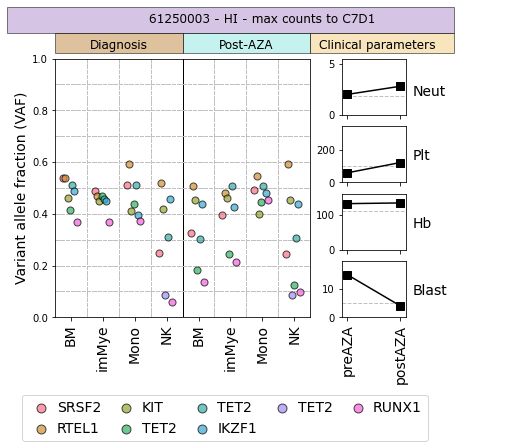

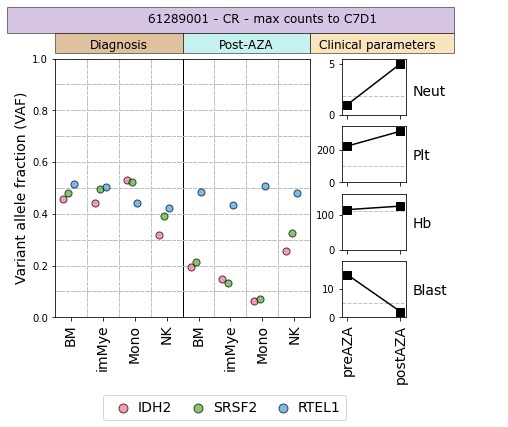

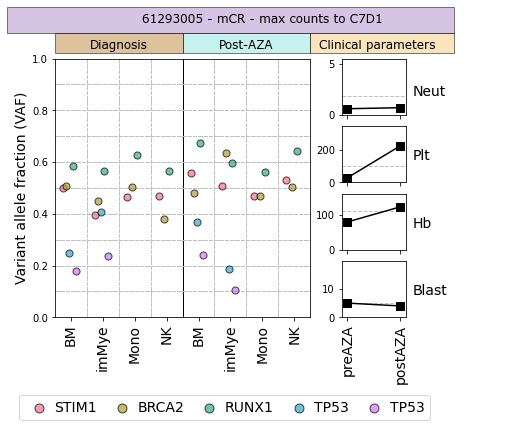

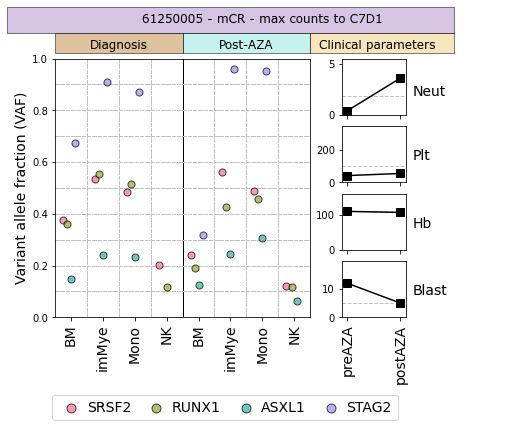

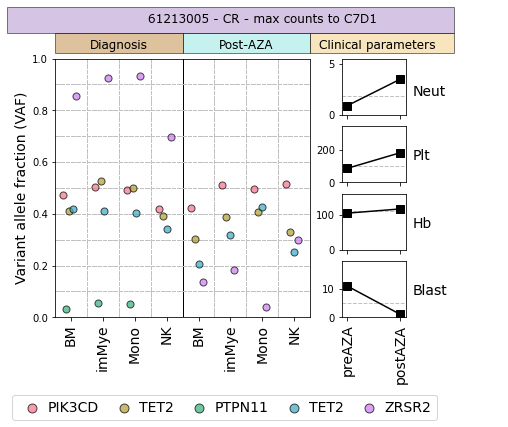

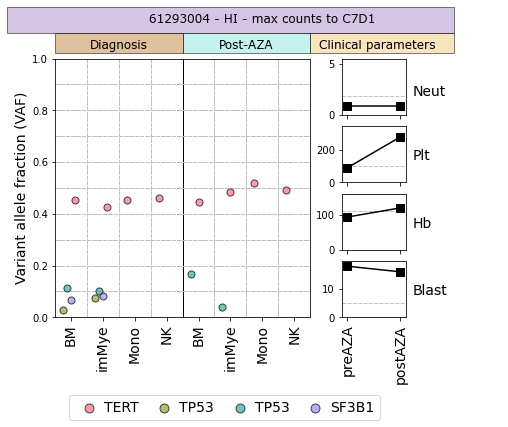

In [25]:
#Graph the responders

for p in resp:
    fig = plt.figure(figsize = (8, 6))
    gs = fig.add_gridspec(5, 5)
    gs.update(wspace=0.5,hspace=0.2)
    ax0 = fig.add_subplot(gs[0:4, 0:3])
    ax1 = fig.add_subplot(gs[0,3])
    ax2 = fig.add_subplot(gs[1,3])
    ax3 = fig.add_subplot(gs[2,3])
    ax4 = fig.add_subplot(gs[3,3])
    ax5 = fig.add_subplot(gs[4,:])
    ax6 = fig.add_subplot(gs[0:4,4])

    #Fetch data for this patient 
    
    if p == 61213005:
        data = df_all_filter_no_blklist.loc[(df_all_filter_no_blklist['PID'].isin([p])) & (df_all_filter_no_blklist['VAF'] > 0.03)].copy()
    elif p == 61293004:
        data = df_all_filter_no_blklist.loc[(df_all_filter_no_blklist['PID'].isin([p])) & (~df_all_filter_no_blklist['var_name'].isin(['BCOR_p.Arg79Trp', 'DNMT3A_p.Arg688Cys']))].copy()
    else:
        data = df_all_filter_no_blklist.loc[(df_all_filter_no_blklist['PID'].isin([p])) & (df_all_filter_no_blklist['VAF'] > 0.05)].copy()
    cl_data = clin_data.loc[clin_data['PID'].isin([p])]

    #Filter out any variants that only appear once
    variants_raw = data['var_name'].drop_duplicates().to_list()
    variants = []
    for v in variants_raw:
        if data['var_name'].value_counts()[v] > 1:
            variants.append(v)
            
            
    ncol = int(math.ceil(len(variants)/2))
    ncol2 = len(variants)
    var_labs = [x.split('_')[0] for x in variants]
    var_dict = dict(zip(variants, var_labs))
    cols = sns.color_palette('husl', n_colors = len(variants))
    palette = dict(zip(variants, cols))
    cat_cols = {'responder_1': '#DFCAEF', 'non-responder_2': '#FFD592', 'pre-treat': '#2ca02c','post-treat': '#9467bd'}
    cat_cols2 = {'responder_1': '#ad8bc9', 'non-responder_2': '#cdcc5d', 'pre-treat': '#98df8a','post-treat': '#c5b0d5'}
    #tableau colors https://help.tableau.com/current/pro/desktop/en-us/formatting_create_custom_colors.htm
    
    #proxy artist for legend
    handles = []
    f, a = plt.subplots()
    for lab in variants:
        lab2 = var_dict[lab]
        line = a.scatter([0], [0], label=lab, color=palette[lab], alpha = 0.7, s = 80, edgecolor = 'black') #for short labels uses label = lab2
        handles.append(line)    
    plt.close(f)
    
    for j, c in enumerate(t_points_sub_reorder):
        #Data for just this calle and time point
        data2 = data.loc[data['time_cell'].isin([c])]
        #Data for variants that occur at least twice
        variants_raw2 = data2['var_name'].drop_duplicates().to_list()
        variants2 = []
        for v in variants_raw2:
            if data['var_name'].value_counts()[v] > 1:  #Need to run condition on entire data set for this pt, not data2 which is just a single time pont for all variants at freq = 1
                variants2.append(v)
        
        for k, v in enumerate(variants2):
            m = len(variants2)
            x = j - 0.25 + (k * (0.5/m))
            y = data2.loc[data2['var_name'].isin([v])]['VAF'].values[0]
            ax0.scatter(x, y, color = palette[v], alpha = 0.7,  s = 50, edgecolor = 'black', linewidth=1) 
                            
        ax0.set_xticks([0,1,2,3,4,5,6,7])
        ax0.set_xticklabels(t_points_sub2_reorder, rotation = 90, fontsize = 14)
        
        ax5.legend(handles = handles, labels = var_labs, fontsize = 14, loc = 'upper center',bbox_to_anchor = [0.38,-0.05], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)    
        ax5.axis('off')
        
        ax0.axvline(x = 3.5, ls = '-', c = 'black', lw = 1, zorder = 0)
            
        for l in [0.5, 1.5, 2.5, 4.5, 5.5, 6.5]:
            ax0.axvline(x = l, ls = '--', c = 'silver', lw = 1, zorder = 0)
        
        ax0.set_ylim(0, 1)
        ax0.set_xlim(-0.5, 7.5)
        ax0.set_ylabel('Variant allele fraction (VAF)', fontsize = 14)
        
        for k in range(9):
            l = (k + 1)/10
            ax0.axhline(l, ls = '--', c = 'silver', lw = 1, zorder = 0)
             

    # Add text to headings
    ax0.text(6,1.15, f'{p} - {IWG_dict[p]} - max counts to C7D1', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight')         
    ax0.text(1.5,1.05, 'Diagnosis', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight') 
    ax0.text(5.5,1.05, 'Post-AZA', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight')
    ax0.text(9.6,1.05, 'Clinical parameters', size=12, verticalalignment='center', horizontalalignment='center', fontfamily = 'Verdana', fontweight = 'ultralight')

    # Create a Rectangle patch for header
    rect1 = patches.Rectangle((-2, 1.1), 14, 0.1, linewidth=1, edgecolor = 'black', facecolor=cat_cols2[C6_outcomes[p]], alpha = 0.5, zorder = 0, clip_on=False)
    rect2 = patches.Rectangle((-0.5, 1.02), 4, 0.08, linewidth=1, edgecolor = 'black', facecolor='#BF843D', alpha = 0.5, zorder = 0, clip_on=False)
    rect3 = patches.Rectangle((3.5, 1.02), 4, 0.08, linewidth=1, edgecolor = 'black', facecolor='#8DE7DF', alpha = 0.5, zorder = 0, clip_on=False)
    rect4 = patches.Rectangle((7.5, 1.02), 4.5, 0.08, linewidth=1, edgecolor = 'black', facecolor='#F2CD7F', alpha = 0.5, zorder = 0, clip_on=False)

    # Add the patch to the Axes
    ax0.add_patch(rect1) 
    ax0.add_patch(rect2)
    ax0.add_patch(rect3)
    ax0.add_patch(rect4)
    
    #Plot the clinical data
    for i, count in enumerate(['Neut', 'Plt', 'Hb', 'BM']):
        
        if count == 'BM':
            cdata = cl_data.iloc[:, [0,1]]
            pre = cdata['BMblast_pre'].values[0]
            post = cdata['BMblast_post'].values[0]
            
        else:
        
            cdata = cl_data.loc[: , (cl_data.columns.str.contains(count))]  
            cols = []
            for n in list(cdata.columns):
                cols.append(n.split('_')[1])

            cdata.columns = cols
            pre = cdata[['Screening', 'C1D1']].min(axis=1).values[0]
            post = cdata[['C2D1', 'C3D1','C4D1', 'C5D1', 'C6D1', 'C7D1']].max(axis=1).values[0]
            
        if count == 'Neut':
            ax1.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8) 
            ax6.text(-0.4, 0.9, 'Neut', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax1.set_ylim(0,maxn)
            ax1.set_xlim(-0.1, 1.1)
            ax1.set_xticks([0,1])
            ax1.set_xticklabels([' ', ' '])
            ax1.axhline(y = 1.8, ls = '--', color = 'silver', lw = 1, zorder = 0)
        elif count == 'Plt':
            ax2.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8)
            ax6.text(-0.4, 0.65, 'Plt', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax2.set_ylim(0,maxp)
            ax2.set_xlim(-0.1, 1.1)
            ax2.set_xticks([0,1])
            ax2.set_xticklabels([' ', ' '])
            ax2.axhline(y = 100, ls = '--', color = 'silver', lw = 1, zorder = 0)
        elif count == 'Hb':
            ax3.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8)
            ax6.text(-0.4, 0.39, 'Hb', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax3.set_ylim(0,maxh)
            ax3.set_xlim(-0.1, 1.1)
            ax3.set_xticks([0,1])
            ax3.set_xticklabels([' ', ' '])
            ax3.axhline(y = 110, ls = '--', color = 'silver', lw = 1, zorder = 0)
        elif count == 'BM':
            ax4.plot([0,1], [pre,post], ls = '-', marker = 's', color = 'k', markersize = 8)
            ax6.text(-0.4, 0.13, 'Blast', size=14, verticalalignment='top', horizontalalignment='left', fontfamily = 'Verdana', fontweight = 'ultralight') 
            ax4.set_ylim(0,maxb)
            ax4.set_xlim(-0.1, 1.1)
            ax4.set_xticks([0,1])
            ax4.set_xticklabels(['preAZA', 'postAZA'], rotation = 90, fontsize = 14)
            ax4.axhline(y = 5, ls = '--', color = 'silver', lw = 1, zorder = 0)

    ax6.axis('off')
    fig.savefig(f'../Results/{p}_responder_max_to_C7_manuscript.png',bbox_inches='tight', dpi = 600)
    fig.savefig(f'../Results/{p}_responder_max_to_C7_manuscript.svg',bbox_inches='tight', dpi = 600)